In [61]:
import pandas as pd
import numpy as np

#data = pd.read_csv("relevantQs.csv", delimiter=',')
data = pd.read_csv("/Users/RoosRiemersma/Documents/KI/jemoer/Leren_Beslissen/Roos/relevantQs.csv", delimiter=',')

clean_data = pd.read_csv("/Users/RoosRiemersma/Documents/KI/jemoer/Leren_Beslissen/Data/clean_data.csv", delimiter=',')

data = data.replace(" ", np.nan)
data.Q50 = data['Q50'].replace(",", ".")

nan = [index for index, row in data.iterrows() if row.isnull().sum() > 70]
data = data.drop(data.index[nan])

alt_columns = [column for column in data.columns.values if column[-3:] == 'alt']

data = data.drop(alt_columns, axis=1)

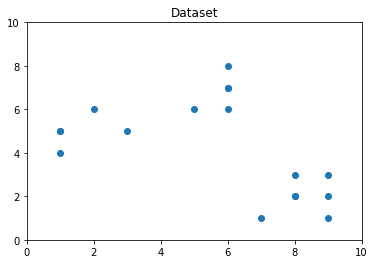

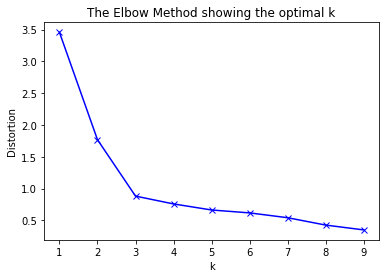

In [59]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [64]:
#clean_data = clean_data.drop(['Q47_Man', 'Q47_Vrouw', 'Q48', 'Q49', 'Q50'], axis=1)

X = data.values

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


ValueError: could not convert string to float: 'Nee'